In [1]:
# Mount GDRIVE jika menggunakan Google Collab
from google.colab import drive
drive.mount('/content/drive')

PATH = '/content/drive/MyDrive/Source Code/'

# Jika tidak menggunakan google collab
# PATH = ''

Mounted at /content/drive


In [2]:
# !pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.3 MB/s eta 0:00:00


In [1]:
import pandas as pd
import os
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kocheng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kocheng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Membaca Dataset

In [11]:
PATH = ""

In [12]:
data = pd.read_csv('tweet_post.csv', delimiter=';')
# data = data[data['category'] != 'inet']
data

,Tweet,date
0,Me and my Udemy courses:,"4/3/2023 00.00.00,,,,,"
1,interesting reads on topics about applying tec...,NaN
2,Ada tambun coyy,"1/3/2023 00.00.00,,,,,"
3,Forbes 30 under arrest ini mah,"15/1/2023 00.00.00,,,,,"
4,SMA mah dispensasi buat cabut berkedok ikut lo...,"12/1/2023 00.00.00,,,,"
...,...,...
298,This mission marks the first reuse of side boo...,"23/6/2019 00.00.00,,,,,"
299,Ultimate Waifu Shiina Mashiro \r\n#Sakurasouno...,NaN
300,Saya melaporkan adanya Njir momen disini,"31/5/2019 00.00.00,,,,,"
301,NaN,"23/5/2019 00.00.00,,,,,"


Menampilkan informasi data.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   296 non-null    object
 1   date    209 non-null    object
dtypes: object(2)
memory usage: 4.9+ KB


Menampilkan jumlah data Null.

In [14]:
data.isnull().sum()

Tweet     7
date     94
dtype: int64

Jika ada data Null maka perlu menjalankan kode dibawah untuk drop data Null, jika tidak ada data Null maka tidak perlu menjalankan kode dibawah ini.

In [15]:
data = data.dropna().reset_index(drop=True)
data

,Tweet,date
0,Me and my Udemy courses:,"4/3/2023 00.00.00,,,,,"
1,Ada tambun coyy,"1/3/2023 00.00.00,,,,,"
2,Forbes 30 under arrest ini mah,"15/1/2023 00.00.00,,,,,"
3,SMA mah dispensasi buat cabut berkedok ikut lo...,"12/1/2023 00.00.00,,,,"
4,Bahas model stable diffusion di TA matem kira ...,"10/1/2023 00.00.00,,,,,"
...,...,...
197,Saya melaporkan adanya Njir momen disini,"31/5/2019 00.00.00,,,,,"
198,This mission marks the first reuse of side boo...,"23/6/2019 00.00.00,,,,,"
199,Saya melaporkan adanya Njir momen disini,"31/5/2019 00.00.00,,,,,"
200,This mission marks the first reuse of side boo...,"23/6/2019 00.00.00,,,,,"


In [16]:
data.isnull().sum()

Tweet    0
date     0
dtype: int64

### Preprocessing

### Casefolding

In [17]:
def case_folding(text):
    text = text.casefold()
    return text

In [9]:
data['title_casefolding'] = data['title'].apply(case_folding)
data

,date,url,title,category,title_casefolding
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance,kemnaker awasi tka di meikarta
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance,bni digitalkan bni java jazz 2020
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,"terbang ke australia, edhy prabowo mau genjot ..."
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,ojk siapkan stimulus ekonomi antisipasi dampak...
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,saran buat anies-rk yang mangkir rapat banjir ...
...,...,...,...,...,...
91012,02/03/2020,https://travel.detik.com/travel-news/d-4882807...,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel,"ketumpahan air panas di pesawat, kamu bisa tun..."
91013,02/03/2020,https://travel.detik.com/fototravel/d-4882796/...,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel,foto: bali & 9 destinasi paling instagramable ...
91014,02/03/2020,https://travel.detik.com/travel-news/d-4882794...,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel,game bikin turis ini liburan ke jepang untuk.....
91015,02/03/2020,https://travel.detik.com/travel-news/d-4882792...,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel,"sekeluarga didepak dari pesawat, maskapai bila..."


### Cleaning

In [10]:
def cleaning(text):

    # Menghapus karakter baris atau tab (\n, \r, \t..)
    text = re.sub(r"\n|\r|\t", " ", text)

    # Menghapus URL
    text = re.sub(r'http[s]?\://\S+', '', text)

    # Menghapus hashtag
    text = re.sub(r'#\S+', '', text)

    # Menghapus mentions (@)
    text = re.sub(r"@\S+", "", text)

    # Menghapus teks dalam tanda kurung
    text = re.sub(r"(\(.*\))|(\[.*\])", "", text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)

    # Menghapus semua karakter yang bukan huruf alfabet
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Hapus spasi ganda yang mungkin tersisa
    text = re.sub(r'\s+', ' ', text).strip()

    # Hapus kata yang terdiri dari karakter berulang
    text = re.sub(r'\b(a+|z+)\w*\b', '', text, flags=re.IGNORECASE)

    # Hapus kata dengan panjang kurang dari 3 atau lebih dari 7 karakter
    text = re.sub(r'\b\w{1,2}\b', '', text)   # kata sangat pendek (1-2 karakter)
    text = re.sub(r'\b\w{10,}\b', '', text)     # kata sangat panjang (10 karakter ke atas)

    return text

In [11]:
data['title_cleaning'] = data['title_casefolding'].apply(cleaning)
data

,date,url,title,category,title_casefolding,title_cleaning
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance,kemnaker awasi tka di meikarta,kemnaker tka meikarta
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance,bni digitalkan bni java jazz 2020,bni bni java jazz
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,"terbang ke australia, edhy prabowo mau genjot ...",terbang edhy prabowo mau genjot budi daya lo...
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,ojk siapkan stimulus ekonomi antisipasi dampak...,ojk siapkan stimulus ekonomi dampak corona
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,saran buat anies-rk yang mangkir rapat banjir ...,saran buat yang mangkir rapat banjir dpr
...,...,...,...,...,...,...
91012,02/03/2020,https://travel.detik.com/travel-news/d-4882807...,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel,"ketumpahan air panas di pesawat, kamu bisa tun...",panas pesawat kamu bisa tuntut maskapai
91013,02/03/2020,https://travel.detik.com/fototravel/d-4882796/...,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel,foto: bali & 9 destinasi paling instagramable ...,foto bali destinasi paling tahun
91014,02/03/2020,https://travel.detik.com/travel-news/d-4882794...,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel,game bikin turis ini liburan ke jepang untuk.....,game bikin turis ini liburan jepang untuk car...
91015,02/03/2020,https://travel.detik.com/travel-news/d-4882792...,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel,"sekeluarga didepak dari pesawat, maskapai bila...",didepak dari pesawat maskapai bilang bau badan


### Stopwords

In [12]:
# Create a slang dictionary
def load_slang_dict(slang_path_file):
    with open(slang_path_file, "r") as file:
        slang_data = file.read().splitlines()
    return dict(slang.split(":") for slang in slang_data)

# Create a stopwords list
def load_stopwords(stopword_path_file):
    with open(stopword_path_file, "r") as file:
        custom_stopwords = file.read().splitlines()
    # Combine custom stopwords with NLTK stopwords
    nltk_stopwords = set(stopwords.words('indonesian'))
    new_stopwords = set(custom_stopwords).union(nltk_stopwords)
    return new_stopwords

# Function to replace slang words and remove stopwords
def replace_slangs_remove_stopwords(text, slangs, stopwords):
    # Tokenizing text into tokens
    tokens = text.split(' ')
    filtered_tokens = []

    for token in tokens:
        # Replace slang words
        if token in slangs:
            token = slangs[token]
        # Add token to result if not in stopwords
        if token not in stopwords:
            filtered_tokens.append(token)
    # print(filtered_tokens)

    # Combine filtered tokens back into a string
    return ' '.join(filtered_tokens)

def stopwords_removal(text):
    # Paths to files
    slang_path_file = os.path.join(PATH, "slang_id.txt")
    stopword_path_file = os.path.join(PATH, "stopwords_id.txt")

    # Load resources
    slangs = load_slang_dict(slang_path_file)
    stopwords_combined = load_stopwords(stopword_path_file)

    cleaned_text = replace_slangs_remove_stopwords(text, slangs, stopwords_combined)
    return cleaned_text

In [15]:
data['title_stopwords'] = data['title_cleaning'].apply(stopwords_removal)
data

,date,url,title,category,title_casefolding,title_cleaning,title_stopwords
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance,kemnaker awasi tka di meikarta,kemnaker tka meikarta,kemnaker tka meikarta
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance,bni digitalkan bni java jazz 2020,bni bni java jazz,bni bni java jazz
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance,"terbang ke australia, edhy prabowo mau genjot ...",terbang edhy prabowo mau genjot budi daya lo...,terbang edhy prabowo genjot budi daya lobster
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance,ojk siapkan stimulus ekonomi antisipasi dampak...,ojk siapkan stimulus ekonomi dampak corona,ojk siapkan stimulus ekonomi dampak corona
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance,saran buat anies-rk yang mangkir rapat banjir ...,saran buat yang mangkir rapat banjir dpr,saran mangkir rapat banjir dpr
...,...,...,...,...,...,...,...
91012,02/03/2020,https://travel.detik.com/travel-news/d-4882807...,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel,"ketumpahan air panas di pesawat, kamu bisa tun...",panas pesawat kamu bisa tuntut maskapai,panas pesawat tuntut maskapai
91013,02/03/2020,https://travel.detik.com/fototravel/d-4882796/...,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel,foto: bali & 9 destinasi paling instagramable ...,foto bali destinasi paling tahun,foto bali destinasi
91014,02/03/2020,https://travel.detik.com/travel-news/d-4882794...,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel,game bikin turis ini liburan ke jepang untuk.....,game bikin turis ini liburan jepang untuk car...,game turis liburan jepang cari yakuza
91015,02/03/2020,https://travel.detik.com/travel-news/d-4882792...,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel,"sekeluarga didepak dari pesawat, maskapai bila...",didepak dari pesawat maskapai bilang bau badan,didepak pesawat maskapai bilang bau badan


### Stemming

In [16]:
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    text_lm = []
    for w in words:
        lm = stemmer.stem(w)
        text_lm.append(lm)

    return ' '.join(text_lm)

In [17]:
data['title_stemming'] = data['title_stopwords'].apply(stemming)
data

KeyboardInterrupt: 

In [20]:
data = data[data['category'] != "travel"]
data = data[data['category'] != "food"]
data = data[data['category'] != "oto"]
data['category'].value_counts()

category
news       32360
hot        16330
finance    14168
health      4919
sport       2436
Name: count, dtype: int64

In [27]:
data_small = data.groupby(by="category").sample(2400)
data_small

,date,url,title,category,title_casefolding,title_cleaning,title_stopwords
10568,04/18/2020,https://finance.detik.com/berita-ekonomi-bisni...,Pesan buat Pemerintah Agar RI Tak Jatuh dalam ...,finance,pesan buat pemerintah agar ri tak jatuh dalam ...,pesan buat tak jatuh dalam krisis gegara co...,pesan jatuh krisis gegara corona
10890,01/31/2020,https://finance.detik.com/foto-bisnis/d-488078...,Kementerian PUPR Anggarkan Rp 11 Triliun untuk...,finance,kementerian pupr anggarkan rp 11 triliun untuk...,pupr triliun untuk rumah subsidi,pupr triliun rumah subsidi
10392,03/30/2020,https://finance.detik.com/bursa-dan-valas/d-49...,Induk Grup Bakrie Untung Rp 850 M Setelah 7 Ta...,finance,induk grup bakrie untung rp 850 m setelah 7 ta...,induk grup bakrie untung setelah tahun rugi,induk grup bakrie untung rugi
5853,05/19/2020,https://finance.detik.com/moneter/d-5021252/bp...,BPJS Kesehatan Siapkan 'Kelas Standar' untuk P...,finance,bpjs kesehatan siapkan 'kelas standar' untuk p...,bpjs kesehatan siapkan kelas standar untuk pes...,bpjs kesehatan siapkan kelas standar peserta
8542,05/21/2020,https://finance.detik.com/berita-ekonomi-bisni...,Awas! Naik Pesawat Pakai Surat Kesehatan Palsu...,finance,awas! naik pesawat pakai surat kesehatan palsu...,naik pesawat pakai surat kesehatan palsu bisa...,pesawat pakai surat kesehatan palsu ketahuan
...,...,...,...,...,...,...,...
84120,03/18/2020,https://sport.detik.com/basket/d-4943471/kevin...,Kevin Durant Terinfeksi Virus Corona,sport,kevin durant terinfeksi virus corona,kevin durant virus corona,kevin durant virus corona
83941,02/12/2020,https://sport.detik.com/basket/d-4896627/sk-na...,SK Naturalisasi Prosper dan Jawato Segera Dite...,sport,sk naturalisasi prosper dan jawato segera dite...,prosper dan jawato segera diteken jokowi,prosper jawato diteken jokowi
82390,02/26/2020,https://sport.detik.com/basket/d-4915351/hasil...,"Hasil NBA: LeBron James Cetak 40 Poin, Lakers ...",sport,"hasil nba: lebron james cetak 40 poin, lakers ...",hasil nba lebron james cetak poin lakers kalah...,hasil nba lebron james cetak poin lakers kalah...
84317,05/28/2020,https://sport.detik.com/sport-lain/d-5031606/m...,Menanti Tyson Vs Tyson,sport,menanti tyson vs tyson,menanti tyson tyson,tyson tyson


In [29]:
from concurrent.futures import ProcessPoolExecutor

def preprocess_pipeline(text):
    try:
        text = case_folding(text)
        text = cleaning(text)
        text = stopwords_removal(text)
        text = stemming(text)
        return text
    except Exception as e:
        print(f"Error processing text: {e}")
        return None


def parallel_preprocess(series, func, max_workers=None):
    if max_workers is None:
        max_workers = os.cpu_count() or 4
    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        results = list(executor.map(func, series))
    return pd.Series(results, index=series.index)

In [30]:
data_small["title_stemming"] = parallel_preprocess(data_small["title"], parallel_preprocess)

BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

## Frekuensi Kemunculan setiap Kata

In [19]:
list_word = data['stemming'].apply(lambda x: x.split()).tolist()

In [20]:
df_list_words = (
                    pd.DataFrame(list_word)
                    .stack() # mengubah list 2D menjadi format 1D.
                    .reset_index(drop=True) # mereset indeks setelah proses stacking.
                    .to_frame(name='Word') # mengonversi hasil stacking menjadi DataFrame dengan kolom "Word".
                    .groupby('Word').size() #  menghitung frekuensi kemunculan setiap kata.
                    .reset_index(name='Total') # mengonversi hasil groupby ke DataFrame dengan kolom 'Word' dan 'Total'.
                    .sort_values(by=['Total', 'Word'], ascending=[False, True]) # mengurutkan hasil berdasarkan total dan kata.
                    .reset_index(drop=True)
                )

df_list_words

,Word,Total
0,orang,1076
1,nak,708
2,dah,410
3,kalo,399
4,suka,342
...,...,...
13631,yutup,1
13632,yuval,1
13633,yyann,1
13634,yyy,1


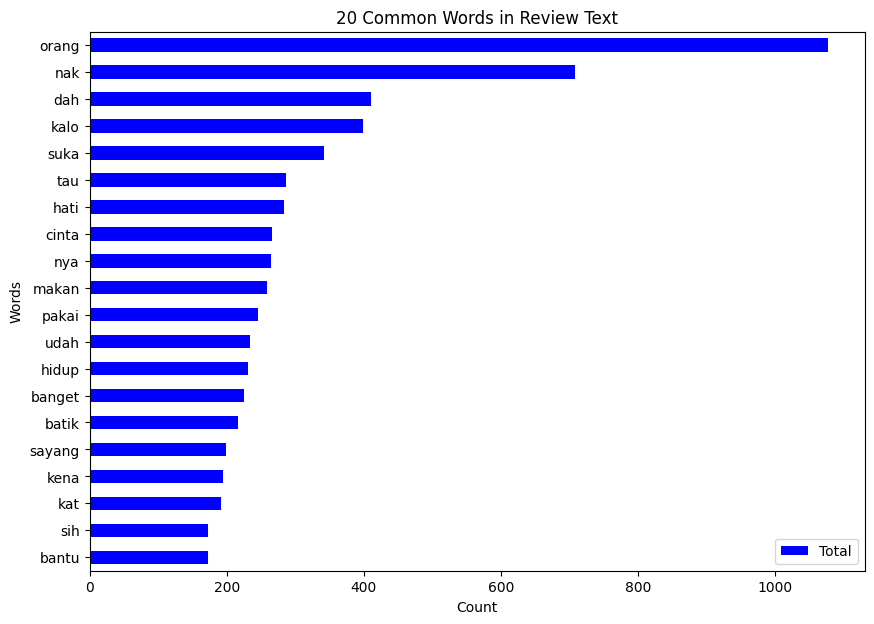

In [21]:
# Ambil 20 data teratas
top_20_words = df_list_words.head(20)

# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(10, 7))
top_20_words.sort_values(by='Total').plot(kind='barh', x='Word', y='Total', ax=ax, color='blue')
ax.set_title("20 Common Words in Review Text")
ax.set_xlabel("Count")
ax.set_ylabel("Words")
plt.show()

## Menyimpan Data Hasil Preprocessing

In [ ]:
# drop preprocessing steps results except stemming
data = data.drop(labels=['title_casefolding', 'title_stopwords', 'title_cleaning'])
data.columns 

In [ ]:
data.to_csv(PATH+'detik_news_title_preprocessing.csv', index=False)
df_list_words.to_csv(PATH+'detik_news_list_words.csv', index=False)
print('Done')

Done
